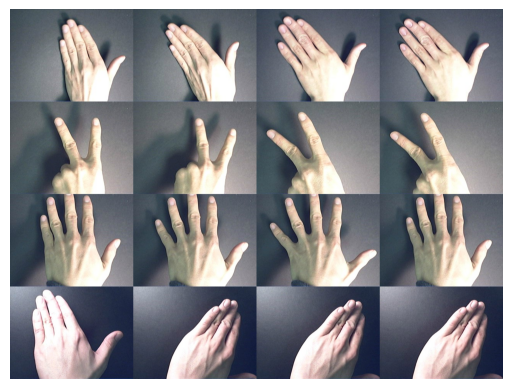

In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# 定义图像文件所在的文件夹路径
image_folder = './temp/'  # 替换为实际的文件夹路径

# 列出文件夹中的所有图像文件
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]

# 确保文件夹中有足够的图像文件
if len(image_files) != 16:
    print("文件夹中没有足够的图像文件。")
else:
    # 读取图像并存储在列表中，并将图像缩放到所需的大小
    images = []
    target_size = (320, 240)  # 目标大小
    for image_file in image_files:
        image_path = os.path.join(image_folder, image_file)
        image = cv2.imread(image_path)
        if image is not None:
            # 缩放图像到目标大小
            image = cv2.resize(image, target_size)
            images.append(image)
        else:
            print(f"无法读取图像文件: {image_file}")

    # 创建一个4x4的宫格图
    rows, cols = 4, 4
    grid_image = np.zeros((rows * target_size[1], cols * target_size[0], 3), dtype=np.uint8)

    # 将图像填充到宫格中
    for i in range(rows):
        for j in range(cols):
            index = i * cols + j
            grid_image[i * target_size[1]: (i + 1) * target_size[1],
                       j * target_size[0]: (j + 1) * target_size[0], :] = images[index]

    # 显示宫格图
    plt.imshow(cv2.cvtColor(grid_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()
